In [91]:
from preparing_script import data_processing_agrochem, anova_by_deeth
import pandas as pd 
import numpy as np 
from scipy.stats import f_oneway as ANOVA
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


подготовка данных из того что уже предобработанно

In [2]:
agrochemistry_total = pd.read_csv('полевые данные общая/ready_data/агрохимия_правленная_1.csv', sep = ';') #важно сомтреть чтобы была правленная агрохимия
agrochemistry_total["Год"] = agrochemistry_total["Год"].astype(str)
agrochemistry_total["GPS №"] = agrochemistry_total["GPS №"].astype(str)

agrochem_columns = ['Год', 'GPS №', 'Тип обработки', 'Глубина', 'повторность',
       'рН солевой вытяжки, ед. рН', 'рН водной вытяжки, ед. рН',
       'Фосфор (подвижная форма), мг/кг', 'Калий (подвижная форма), млн-1',
       'Общий азот, %', 'Органический углерод, %']

# общий датафрейм
agrochemistry_main = agrochemistry_total[agrochemistry_total['Глубина'].isin(['0-10',"10-20","20-30"])][agrochem_columns] #можно будет добавить глубины 20-30
agrochemistry_main['GPS №'] = agrochemistry_main['GPS №'].astype(int)
agrochemistry_main.drop('повторность', axis = 1, inplace= True)
agrochemistry_main.dropna(axis = 0, inplace= True)

# разбивка по точкам на ПП
pp_points = [525,526,527,528,586,529, 584,585]
by_points = agrochemistry_main[agrochemistry_main["GPS №"].isin(pp_points)]

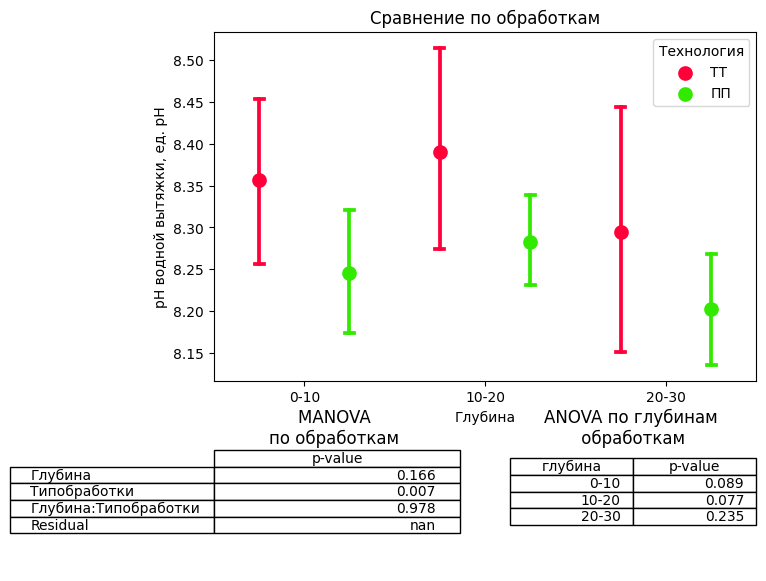

In [3]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'рН водной вытяжки, ед. рН', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/pH_вод_обработки.jpg')


In [4]:
stats

рН водной вытяжки, ед. рН                    
                                           mean variation       std
Тип обработки Глубина                                              
ПП            0-10                     8.245758  0.025599  0.214360
              10-20                    8.282727  0.019099  0.160649
              20-30                    8.202800  0.021151  0.177072
ТТ            0-10                     8.356111  0.025807  0.221894
              10-20                    8.389524  0.032071  0.275708
              20-30                    8.294000  0.035294  0.303004

In [92]:
anova_by_deeth(agrochemistry_main,'рН водной вытяжки, ед. рН' )

,глубины,ПП,ТТ
0,0-10/10-20,0.43,0.68
1,10-20/20-30,0.08,0.33
2,0-10/20-30,0.42,0.50


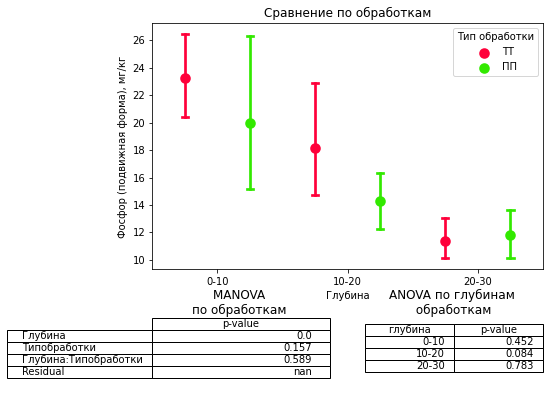

In [5]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Фосфор (подвижная форма), мг/кг', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/фосфор_обработки.jpg')


In [6]:
stats

Фосфор (подвижная форма), мг/кг                     
                                                 mean variation        std
Тип обработки Глубина                                                     
ПП            0-10                          19.982789  0.860647  17.464783
              10-20                         14.267293  0.425185   6.160291
              20-30                         11.790634  0.398701   4.797870
ТТ            0-10                          23.233092  0.271366   6.487447
              10-20                         18.185711  0.548862  10.227940
              20-30                         11.402649  0.270301   3.190320

In [93]:
anova_by_deeth(agrochemistry_main,'Фосфор (подвижная форма), мг/кг')

,глубины,ПП,ТТ
0,0-10/10-20,0.08,0.08
1,10-20/20-30,0.10,0.02
2,0-10/20-30,0.03,0.00


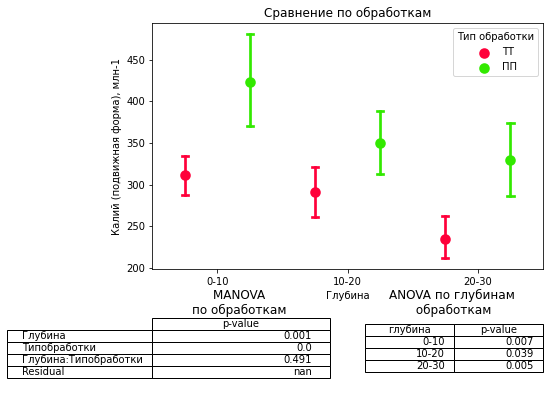

In [7]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Калий (подвижная форма), млн-1', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/калий_обработки.jpg')


In [8]:
stats

Калий (подвижная форма), млн-1                      
                                                mean variation         std
Тип обработки Глубина                                                     
ПП            0-10                        422.846028  0.383640  164.735828
              10-20                       349.779999  0.315694  112.135714
              20-30                       329.135457  0.342957  115.206880
ТТ            0-10                        311.092648  0.165167   52.871964
              10-20                       291.527019  0.238275   71.178987
              20-30                       234.665379  0.215172   52.265671

In [94]:
anova_by_deeth(agrochemistry_main,'Калий (подвижная форма), млн-1')

,глубины,ПП,ТТ
0,0-10/10-20,0.04,0.34
1,10-20/20-30,0.50,0.01
2,0-10/20-30,0.02,0.00


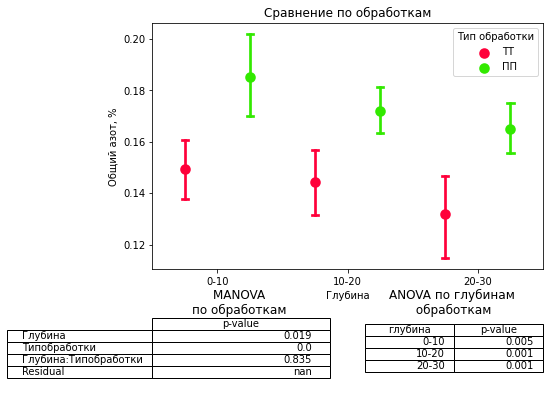

In [9]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Общий азот, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/азот_обработки.jpg')


In [10]:
stats

Общий азот, %                    
                               mean variation       std
Тип обработки Глубина                                  
ПП            0-10         0.185152  0.254762  0.047901
              10-20        0.172121  0.146392  0.025588
              20-30        0.165200  0.146404  0.024685
ТТ            0-10         0.149444  0.172011  0.026451
              10-20        0.144286  0.202426  0.029928
              20-30        0.132000  0.228448  0.031214

In [95]:
anova_by_deeth(agrochemistry_main,'Общий азот, %')

,глубины,ПП,ТТ
0,0-10/10-20,0.17,0.57
1,10-20/20-30,0.30,0.24
2,0-10/20-30,0.06,0.09


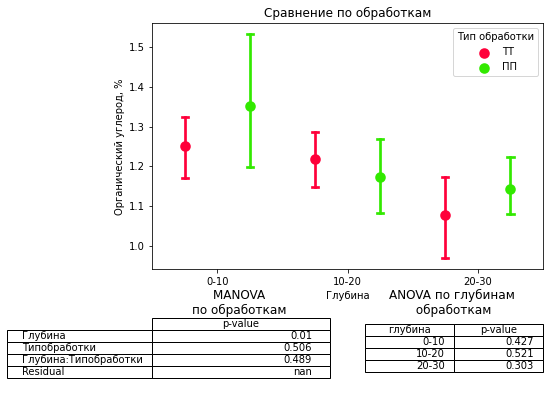

In [11]:
stats , aov, stat_test_df,fig = data_processing_agrochem(df = agrochemistry_main, type_ = 'Тип обработки', agrochem_property = 'Органический углерод, %', to_lable = "обработкам", by_points= 0)
stats
fig.savefig('рисунки/агрохимия/углерод_обработки.jpg')


In [12]:
stats

Органический углерод, %                    
                                         mean variation       std
Тип обработки Глубина                                            
ПП            0-10                   1.350852  0.369577  0.506985
              10-20                  1.173987  0.240996  0.287312
              20-30                  1.144863  0.159478  0.186345
ТТ            0-10                   1.251465  0.139736  0.179945
              10-20                  1.218601  0.132179  0.165052
              20-30                  1.078673  0.185524  0.207144

In [96]:
anova_by_deeth(agrochemistry_main,'Органический углерод, %')

,глубины,ПП,ТТ
0,0-10/10-20,0.09,0.56
1,10-20/20-30,0.66,0.03
2,0-10/20-30,0.06,0.02
